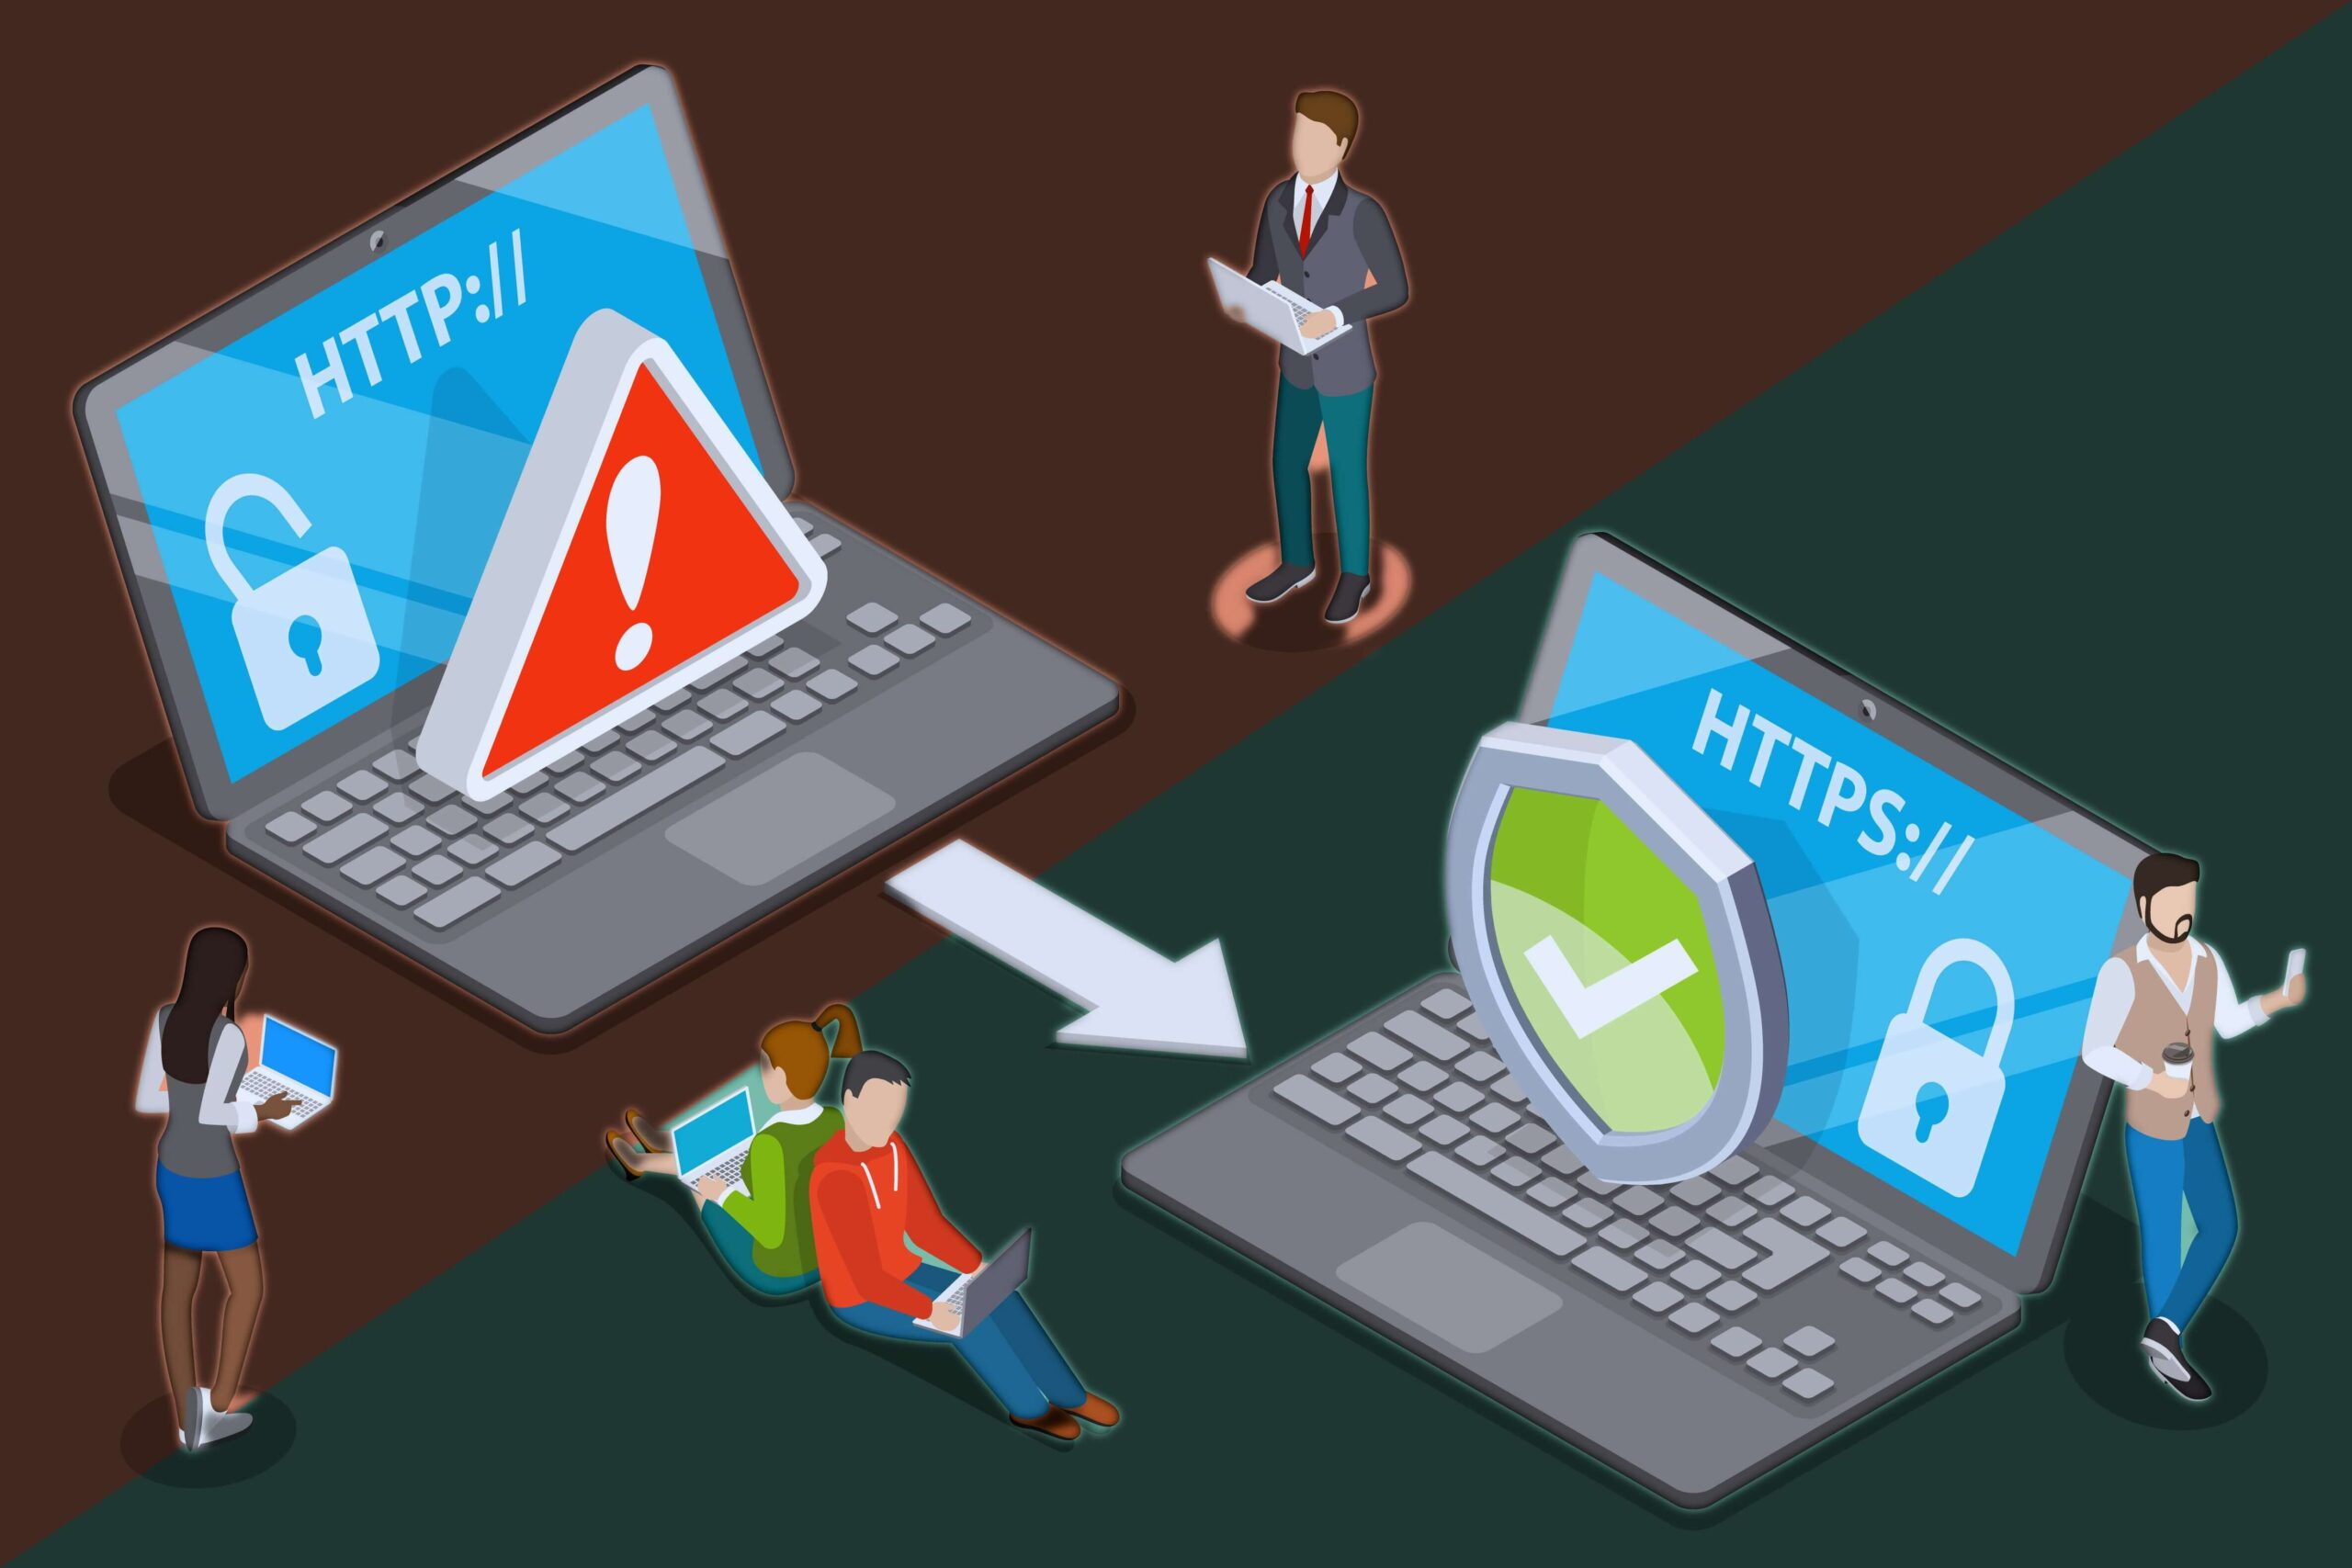

## Project Title: A/B Testing Analysis to Evaluate the Impact of a Website Redesign on User Engagement
Objective:

The goal of this project is to conduct an A/B testing analysis to evaluate the impact of a website redesign on user engagement metrics such as time spent on the page, click-through rate (CTR), and conversion rate. The analysis will involve statistical techniques to determine whether the new design (intervention) has a significant impact compared to the old design.

### Importing Libraries

In [140]:
import pandas as pd
import numpy as np

### Generating the new data for the Analysis

In [141]:
# Set random seed for reproducibility
np.random.seed(42)

In [142]:
# Generating synthetic data
num_users = 1000  # Number of users in the experiment

In [143]:
# Simulate user IDs
user_ids = np.arange(1, num_users + 1)

In [144]:
# Randomly assign users to control (A) and treatment (B) groups
groups = np.random.choice(['A', 'B'], size=num_users, p=[0.5, 0.5])

In [145]:
# Simulate time spent on the page (in seconds)
# Control group (A) has a mean of 120 seconds, treatment group (B) has a mean of 150 seconds
time_spent = np.where(groups == 'A', 
                      np.random.normal(120, 30, num_users), 
                      np.random.normal(150, 35, num_users))
time_spent = np.clip(time_spent, 0, None)  # Ensure no negative values

In [146]:
# Simulate click-through rate (CTR)
# Control group (A) has a 20% CTR, treatment group (B) has a 25% CTR
clicked = np.where(groups == 'A', 
                   np.random.binomial(1, 0.2, num_users), 
                   np.random.binomial(1, 0.25, num_users))

In [147]:
# Simulate conversion rate
# Control group (A) has a 10% conversion rate, treatment group (B) has a 15% conversion rate
converted = np.where(groups == 'A', 
                     np.random.binomial(1, 0.1, num_users), 
                     np.random.binomial(1, 0.15, num_users))

In [148]:
# Creating DataFrame for the Analysis
data = pd.DataFrame({
    'user_id': user_ids,
    'group': groups,
    'time_spent': time_spent,
    'clicked': clicked,
    'converted': converted
})

In [149]:
# Save the DataFrame to CSV
data.to_csv('ab_test_data.csv', index=False)

In [150]:
# Display the first few rows
data.head()

,user_id,group,time_spent,clicked,converted
0,1,A,125.331030,0,0
1,2,B,147.091305,0,1
2,3,B,97.334787,0,1
3,4,B,176.601959,0,0
4,5,A,136.793713,0,0


In [151]:
# Disply the last few rows
data.tail()

,user_id,group,time_spent,clicked,converted
995,996,A,80.399325,0,1
996,997,B,141.033709,0,0
997,998,A,118.888896,1,0
998,999,B,147.838253,0,0
999,1000,A,99.227371,0,0


In [152]:
#Check the shape of dataset
print(data.shape)
print("The dataset has",data.shape[0], "rows")
print("The dataset has",data.shape[1], "colunms")

(1000, 5)
The dataset has 1000 rows
The dataset has 5 colunms


In [153]:
# Check the size of the column "Group"
print(data['group'].value_counts())  # Check group sizes

A    503
B    497
Name: group, dtype: int64


In [154]:
# DataSet info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     1000 non-null   int32  
 1   group       1000 non-null   object 
 2   time_spent  1000 non-null   float64
 3   clicked     1000 non-null   int32  
 4   converted   1000 non-null   int32  
dtypes: float64(1), int32(3), object(1)
memory usage: 27.5+ KB


In [155]:
# Summary statistics
data.describe()

,user_id,time_spent,clicked,converted
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,137.572715,0.226000,0.134000
std,288.819436,34.157429,0.418448,0.340823
min,1.000000,34.543721,0.000000,0.000000
25%,250.750000,113.988943,0.000000,0.000000
50%,500.500000,135.576646,0.000000,0.000000
75%,750.250000,162.760801,0.000000,0.000000
max,1000.000000,246.588101,1.000000,1.000000


In [156]:
# Check for missing values
data.isnull().sum()

user_id       0
group         0
time_spent    0
clicked       0
converted     0
dtype: int64

In [157]:
# Check if there is any duplicated values in DataSet
data.duplicated().sum()

0

In [158]:
data.index

RangeIndex(start=0, stop=1000, step=1)

### Importing Libraries for further Analysis & Visualization

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

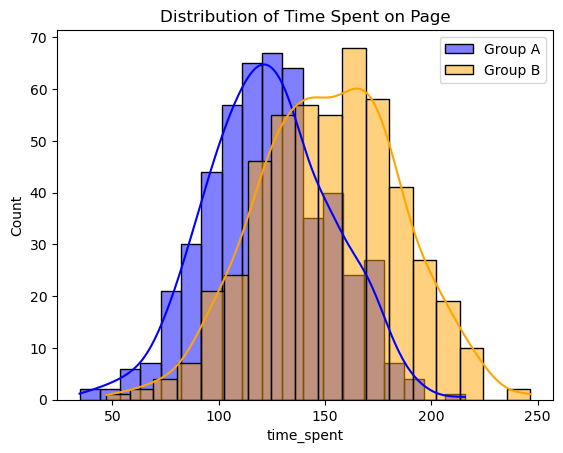

In [160]:
# Visualized distribution of Time Spend on Page
sns.histplot(data[data['group'] == 'A']['time_spent'], label='Group A', color='blue', kde=True)
sns.histplot(data[data['group'] == 'B']['time_spent'], label='Group B', color='orange', kde=True)
plt.legend()
plt.title('Distribution of Time Spent on Page')
plt.show()

 ### Descriptive Statistics

#### Defining Metrics and Groups

In [161]:
# Calculate conversion rates and other summary statistics
conversion_rates = data.groupby('group')['converted'].mean()
print("Conversion Rates:\n", conversion_rates)

Conversion Rates:
 group
A    0.117296
B    0.150905
Name: converted, dtype: float64


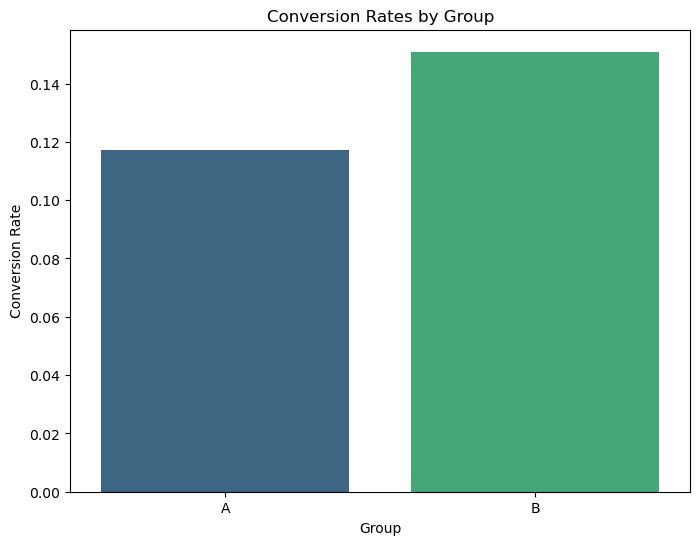

In [162]:
# Visualize the results
plt.figure(figsize=(8, 6))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette='viridis')
plt.title('Conversion Rates by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.show()

### A/B Testing Analysis

####  1. Compare Time Spent on Page:

  Used a two-sample t - test to compare the mean time spent on the page between the two groups.

In [163]:
# Extract time spent for both groups
time_spent_A = data[data['group'] == 'A']['time_spent']
time_spent_B = data[data['group'] == 'B']['time_spent']

In [164]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(time_spent_A, time_spent_B)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -14.413528707791391, P-value: 6.3220609709613525e-43


####     2. Compare Click-Through Rate (CTR):

  Used a chi-square test to compare the CTR between the two groups.

In [166]:
# Create contingency table
ctr_table = pd.crosstab(data['group'], data['clicked'])

In [167]:
# Perform chi-square test
chi2_stat, p_value, _, _ = stats.chi2_contingency(ctr_table)
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")

Chi-square statistic: 9.310702750641683, P-value: 0.002278190821467465


#### 3. Compare Conversion Rate:

 Used a chi-square test to compare the conversion rate between the two groups.

In [169]:
# Create contingency table
conversion_table = pd.crosstab(data['group'], data['converted'])

In [170]:
# Perform chi-square test
chi2_stat, p_value, _, _ = stats.chi2_contingency(conversion_table)
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")

Chi-square statistic: 2.152419840014864, P-value: 0.14234538454174742


### 1. Landing Page Testing

In [171]:
# Compare conversion rates between groups
landing_page_conversion = df.groupby('group')['converted'].mean()
print("Landing Page Conversion Rates:\n", landing_page_conversion)

Landing Page Conversion Rates:
 group
A    0.117296
B    0.150905
Name: converted, dtype: float64


In [188]:
# Perform a chi-square test to check if the difference is significant
contingency_table = pd.crosstab(df['group'], df['converted'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Landing Page:\n p-value = {p}")

Chi-square test for Landing Page:
 p-value = 0.14234538454174742


### 2. Button Testing

In [173]:
# Compare click-through rates (CTR) between groups
button_ctr = df.groupby('group')['clicked'].mean()
print("Button Click-Through Rates:\n", button_ctr)

Button Click-Through Rates:
 group
A    0.184891
B    0.267606
Name: clicked, dtype: float64


In [187]:
# Perform a chi-square test to check if the difference is significant
contingency_table = pd.crosstab(df['group'], df['clicked'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Button:\n p-value = {p}")

Chi-square test for Button:
 p-value = 0.002278190821467465


### 3. Headline Testing

In [175]:
# Compare time spent on the page between groups
headline_time_spent = df.groupby('group')['time_spent'].mean()
print("Average Time Spent on Page by Group:\n", headline_time_spent)

Average Time Spent on Page by Group:
 group
A    123.486192
B    151.829298
Name: time_spent, dtype: float64


In [186]:
# Perform a t-test to check if the difference is significant
group_A_time = df[df['group'] == 'A']['time_spent']
group_B_time = df[df['group'] == 'B']['time_spent']
t_stat, p = stats.ttest_ind(group_A_time, group_B_time)
print(f"T-test for Headline:\n p-value = {p}")

T-test for Headline:
 p-value = 6.3220609709613525e-43


### 4. Image Testing

In [177]:
# Compare conversion rates between groups (similar to landing page testing)
image_conversion = df.groupby('group')['converted'].mean()
print("Image Conversion Rates:\n", image_conversion)

Image Conversion Rates:
 group
A    0.117296
B    0.150905
Name: converted, dtype: float64


In [185]:
# Perform a chi-square test to check if the difference is significant
contingency_table = pd.crosstab(df['group'], df['converted'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Image:\n p-value = {p}")

Chi-square test for Image:
 p-value = 0.14234538454174742


### 5. Pricing Testing

In [179]:
# Compare conversion rates between groups (similar to landing page testing)
pricing_conversion = df.groupby('group')['converted'].mean()
print("Pricing Conversion Rates:\n", pricing_conversion)

Pricing Conversion Rates:
 group
A    0.117296
B    0.150905
Name: converted, dtype: float64


In [184]:
# Perform a chi-square test to check if the difference is significant
contingency_table = pd.crosstab(df['group'], df['converted'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Pricing:\n p-value = {p}")

Chi-square test for Pricing:
 p-value = 0.14234538454174742


### Additional Insights: Time Spent vs. Conversion

In [181]:
# Check if users who spent more time on the page are more likely to convert
df['time_spent_bin'] = pd.qcut(df['time_spent'], q=4)  # Bin time spent into quartiles
time_spent_conversion = df.groupby('time_spent_bin')['converted'].mean()
print("Conversion Rates by Time Spent Quartiles:\n", time_spent_conversion)

Conversion Rates by Time Spent Quartiles:
 time_spent_bin
(34.543, 113.989]     0.104
(113.989, 135.577]    0.124
(135.577, 162.761]    0.180
(162.761, 246.588]    0.128
Name: converted, dtype: float64


In [183]:
# Perform a chi-square test to check if the difference is significant
contingency_table = pd.crosstab(df['time_spent_bin'], df['converted'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Time Spent vs. Conversion:\n p-value = {p}")

Chi-square test for Time Spent vs. Conversion:
 p-value = 0.07888268966776012
